# Création des modèles

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

## Données inchangées

On normalise juste les données, on ne fait pas d'autres manipulations (outliers, ...).

In [2]:
from sklearn.model_selection import train_test_split

# On sélectionne les colonnes d'entrée (features) et la cible
X = data.drop(columns=['Cover_Type'])
y = data['Cover_Type']

# On divise les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# On normalise les données continues 
from sklearn.preprocessing import StandardScaler

continuous_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                      'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                      'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()

# On applique le scaler uniquement sur les colonnes continues
#X_train[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
#X_test[continuous_columns] = scaler.transform(X_test[continuous_columns])

y_train_adj = y_train - 1
y_test_adj = y_test - 1

In [3]:
X_train_hill = X_train.drop(columns=['Hillshade_9am'])
X_test_hill = X_test.drop(columns=['Hillshade_9am'])

X_train_hill2 = X_train.drop(columns=['Hillshade_3pm'])
X_test_hill2 = X_test.drop(columns=['Hillshade_3pm'])

X_test_vert = X_test_hill.drop(columns=['Vertical_Distance_To_Hydrology'])
X_train_vert = X_train_hill.drop(columns=['Vertical_Distance_To_Hydrology'])



X_train_dist = X_train_hill.copy()
X_test_dist = X_test_hill.copy()
# Ajouter la nouvelle colonne 'Distance_To_Hydrology' au DataFrame
X_train_dist['Distance_To_Hydrology'] = np.sqrt(
    X_train_dist['Vertical_Distance_To_Hydrology']**2 + X_train_dist['Horizontal_Distance_To_Hydrology']**2)
X_train_dist = X_train_dist.drop(columns=['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Hydrology'])
X_test_dist['Distance_To_Hydrology'] = np.sqrt(
    X_test_dist['Vertical_Distance_To_Hydrology']**2 + X_test_dist['Horizontal_Distance_To_Hydrology']**2)
X_test_dist = X_test_dist.drop(columns=['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Hydrology'])

In [109]:
X_train_hill2 = X_train.drop(columns=['Hillshade_9am'])
X_test_hill2 = X_test.drop(columns=['Hillshade_9am'])

X_train_hill2['Elevation'] = X_train_hill2['Elevation'] - X_train_hill2['Vertical_Distance_To_Hydrology']
X_test_hill2['Elevation'] = X_test_hill2['Elevation'] - X_test_hill2['Vertical_Distance_To_Hydrology']

In [110]:
X_train_hill3 = X_train_hill2.copy()
X_test_hill3 = X_test_hill2.copy()

X_train_hill3['Aspect'] = np.sin(X_train_hill3['Aspect']*np.pi/180)
X_test_hill3['Aspect'] = np.sin(X_test_hill3['Aspect']*np.pi/180)

In [111]:
X_train_hill4 = X_train_hill3.copy()
X_test_hill4 = X_test_hill3.copy()

X_train_hill4['Slope'] = np.sin(X_train_hill4['Slope']*np.pi/180)
X_test_hill4['Slope'] = np.sin(X_test_hill4['Slope']*np.pi/180)

## Modèle linéaire simple : régression logistique

On va créer un modèle linéaire simple qui va nous donner une base de performance à battre dans la suite.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialiser et entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=20000,random_state=42)
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle de régression logistique : {accuracy:.4f}")

# Afficher un rapport de classification pour des métriques plus détaillées
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Précision du modèle de régression logistique : 0.5712
Rapport de classification :
              precision    recall  f1-score   support

           1       0.46      0.44      0.45       648
           2       0.46      0.40      0.43       648
           3       0.53      0.54      0.53       648
           4       0.82      0.87      0.84       648
           5       0.58      0.63      0.60       648
           6       0.43      0.37      0.40       648
           7       0.65      0.75      0.69       648

    accuracy                           0.57      4536
   macro avg       0.56      0.57      0.57      4536
weighted avg       0.56      0.57      0.57      4536



/Users/steph/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


On va maintenant essayer tous les modèles classiques de classification.

## Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# On initialise et entraîner le modèle de Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# On prédit sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# On évalue les performances
print("Précision Random Forest : ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Précision Random Forest :  0.876984126984127
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       648
           2       0.80      0.71      0.76       648
           3       0.85      0.88      0.87       648
           4       0.95      0.98      0.96       648
           5       0.90      0.95      0.93       648
           6       0.87      0.88      0.88       648
           7       0.94      0.96      0.95       648

    accuracy                           0.88      4536
   macro avg       0.87      0.88      0.88      4536
weighted avg       0.87      0.88      0.88      4536



In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# On initialise et entraîner le modèle de Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train_hill4, y_train)

# On prédit sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test_hill4)

# On évalue les performances
print("Précision Random Forest : ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Précision Random Forest :  0.8787477954144621
              precision    recall  f1-score   support

           1       0.79      0.80      0.79       648
           2       0.82      0.70      0.75       648
           3       0.87      0.89      0.88       648
           4       0.95      0.98      0.96       648
           5       0.91      0.97      0.94       648
           6       0.88      0.88      0.88       648
           7       0.94      0.94      0.94       648

    accuracy                           0.88      4536
   macro avg       0.88      0.88      0.88      4536
weighted avg       0.88      0.88      0.88      4536



Ce modèle permet de récupérer l'importance des features.

                               Feature  Importance
1                            Elevation    0.202691
0                                   Id    0.132456
6      Horizontal_Distance_To_Roadways    0.079460
10  Horizontal_Distance_To_Fire_Points    0.058056
14                    Wilderness_Area4    0.052549
4     Horizontal_Distance_To_Hydrology    0.048051
7                        Hillshade_9am    0.043005
5       Vertical_Distance_To_Hydrology    0.042492
2                               Aspect    0.038933
8                       Hillshade_Noon    0.037254
9                        Hillshade_3pm    0.036744
3                                Slope    0.029819
24                         Soil_Type10    0.022070
52                         Soil_Type38    0.021124
11                    Wilderness_Area1    0.017932
53                         Soil_Type39    0.016785
17                          Soil_Type3    0.016433
13                    Wilderness_Area3    0.015648
18                          Soi

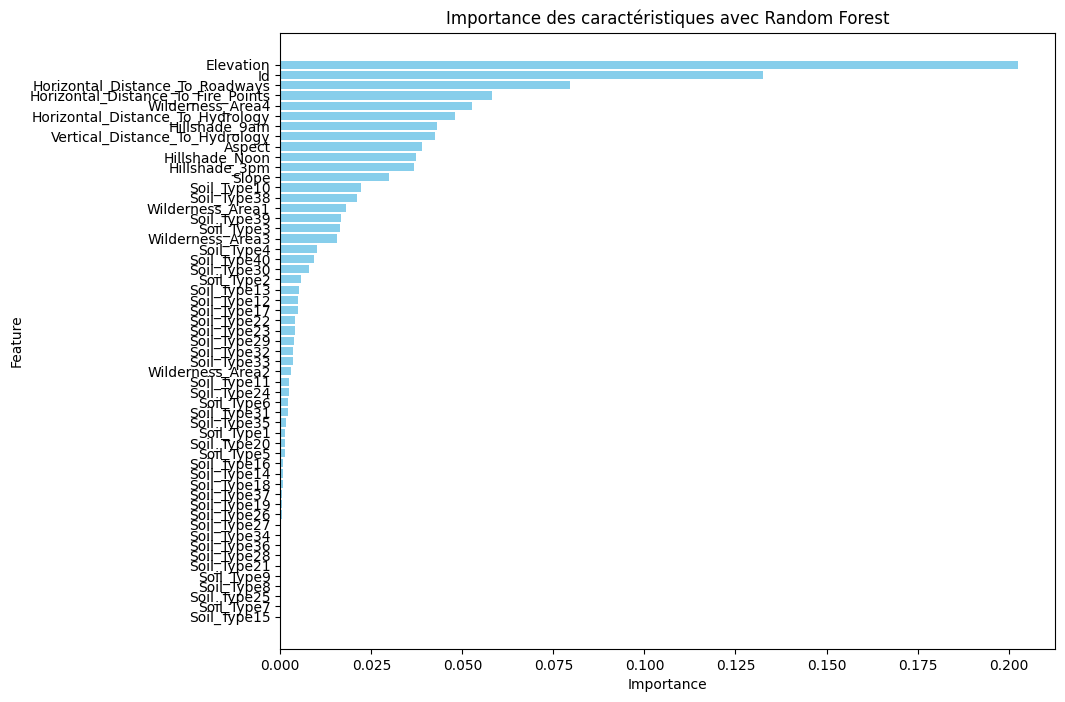

In [6]:
# On récupère les importances des features
features_importances = rf_model.feature_importances_

# On crée un DataFrame pour visualiser les importances des features
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': features_importances
})

# On trie les features par importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Affiche le DataFrame trié (facultatif)
print(importance_df)

# Visualiser les importances des caractéristiques
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance des caractéristiques avec Random Forest")
plt.gca().invert_yaxis()  # Inverser l'axe y pour voir les caractéristiques les plus importantes en haut
plt.show()

À titre indicatif je veux sommer l'importance des Soil_type.

In [23]:
# On filtre pour garder uniquement les colonnes Soil_type
soil_type_importance_df = importance_df[importance_df['Feature'].str.startswith('Soil_Type')]

# On affiche les 10 caractéristiques les plus importantes
print(soil_type_importance_df.head(10), "\n")

# On somme
total_soil_type_importance = soil_type_importance_df['Importance'].sum()
print("Importance total des Soil_type = ", total_soil_type_importance)

        Feature  Importance
24  Soil_Type10    0.022070
52  Soil_Type38    0.021124
53  Soil_Type39    0.016785
17   Soil_Type3    0.016433
18   Soil_Type4    0.010167
54  Soil_Type40    0.009210
44  Soil_Type30    0.008014
16   Soil_Type2    0.005693
27  Soil_Type13    0.005132
26  Soil_Type12    0.004833 

Importance total des Soil_type =  0.1618357786185291


En sommant, le type de sol devient le deuxième feature le plus important.

Ce modèle est prometteur.

## XGBoost

In [60]:
import xgboost as xgb
y_ajusted = y -1

# Paramètres de XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, 
                              n_estimators=300, max_depth=10, learning_rate=0.1, 
                              subsample=0.8, colsample_bytree=0.8, random_state=42)

# On entraîne le modèle
xgb_model.fit(X_train, y_train_adj)

# On prédit sur l'ensemble de test
y_pred_xgb = xgb_model.predict(X_test)

# On évalue les performances
print("Précision XGBoost : ", accuracy_score(y_test_adj, y_pred_xgb))
print(classification_report(y_test_adj, y_pred_xgb))


Précision XGBoost :  0.8891093474426808
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       648
           1       0.80      0.74      0.77       648
           2       0.88      0.90      0.89       648
           3       0.96      0.98      0.97       648
           4       0.92      0.96      0.94       648
           5       0.91      0.91      0.91       648
           6       0.94      0.95      0.95       648

    accuracy                           0.89      4536
   macro avg       0.89      0.89      0.89      4536
weighted avg       0.89      0.89      0.89      4536



Ce modèle est prometteur.

In [106]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
y_ajusted = y -1

# Paramètres de XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, 
                              n_estimators=300, max_depth=10, learning_rate=0.1, 
                              subsample=0.8, colsample_bytree=0.8, random_state=42)

# On entraîne le modèle
xgb_model.fit(X_train_hill4, y_train_adj)

# On prédit sur l'ensemble de test
y_pred_xgb = xgb_model.predict(X_test_hill4)

# On évalue les performances
print("Précision XGBoost : ", accuracy_score(y_test_adj, y_pred_xgb))
print(classification_report(y_test_adj, y_pred_xgb))

Précision XGBoost :  0.8952821869488536
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       648
           1       0.80      0.74      0.77       648
           2       0.90      0.91      0.90       648
           3       0.96      0.98      0.97       648
           4       0.92      0.95      0.94       648
           5       0.91      0.92      0.92       648
           6       0.95      0.96      0.95       648

    accuracy                           0.90      4536
   macro avg       0.89      0.90      0.89      4536
weighted avg       0.89      0.90      0.89      4536



## LightGBM

In [44]:
import lightgbm as lgb

# Paramètres de LightGBM
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=7, 
                               n_estimators=300, max_depth=10, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8, random_state=42)

# On entraîne le modèle
lgb_model.fit(X_train, y_train)

# On prédit sur l'ensemble de test
y_pred_lgb = lgb_model.predict(X_test)

# On évalue les performances
print("\n","Précision LightGBM : ", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))



 Précision LightGBM :  0.8917548500881834
              precision    recall  f1-score   support

           1       0.81      0.80      0.81       648
           2       0.80      0.74      0.77       648
           3       0.89      0.90      0.89       648
           4       0.96      0.98      0.97       648
           5       0.92      0.95      0.94       648
           6       0.90      0.92      0.91       648
           7       0.94      0.95      0.95       648

    accuracy                           0.89      4536
   macro avg       0.89      0.89      0.89      4536
weighted avg       0.89      0.89      0.89      4536



Ce modèle est prometteur.

In [112]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Paramètres de LightGBM
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=7, 
                               n_estimators=300, max_depth=10, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8, random_state=42, verbose=-1)

# On entraîne le modèle
lgb_model.fit(X_train_hill4, y_train)

# On prédit sur l'ensemble de test
y_pred_lgb = lgb_model.predict(X_test_hill4)

# On évalue les performances
print("\n","Précision LightGBM : ", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


 Précision LightGBM :  0.8983686067019401
              precision    recall  f1-score   support

           1       0.82      0.79      0.81       648
           2       0.80      0.77      0.78       648
           3       0.90      0.92      0.91       648
           4       0.97      0.99      0.98       648
           5       0.93      0.95      0.94       648
           6       0.91      0.92      0.92       648
           7       0.94      0.95      0.95       648

    accuracy                           0.90      4536
   macro avg       0.90      0.90      0.90      4536
weighted avg       0.90      0.90      0.90      4536



## SVM

In [33]:
from sklearn.svm import SVC

# Initialiser et entraîner le modèle SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle SVM : {accuracy:.4f}")
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle SVM : 0.3893
Rapport de classification :
               precision    recall  f1-score   support

           1       0.40      0.00      0.01       648
           2       0.49      0.40      0.44       648
           3       0.47      0.24      0.32       648
           4       0.54      0.79      0.64       648
           5       0.00      0.00      0.00       648
           6       0.25      0.57      0.35       648
           7       0.38      0.73      0.50       648

    accuracy                           0.39      4536
   macro avg       0.36      0.39      0.32      4536
weighted avg       0.36      0.39      0.32      4536



/Users/steph/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steph/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steph/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ce modèle est plutôt mauvais.

## K-Nearest Neighbors (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# On initialise et entraîne le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster `n_neighbors`
knn_model.fit(X_train, y_train)

# On prédit sur l'ensemble de test
y_pred = knn_model.predict(X_test)

# On évalue les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle KNN : {accuracy:.4f}")
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle KNN : 0.5516
Rapport de classification :
               precision    recall  f1-score   support

           1       0.39      0.38      0.38       648
           2       0.46      0.39      0.42       648
           3       0.51      0.59      0.55       648
           4       0.77      0.85      0.81       648
           5       0.52      0.53      0.52       648
           6       0.58      0.55      0.57       648
           7       0.61      0.57      0.59       648

    accuracy                           0.55      4536
   macro avg       0.55      0.55      0.55      4536
weighted avg       0.55      0.55      0.55      4536



On optimise les hyperparamètres.

In [42]:
from sklearn.model_selection import GridSearchCV

# On définit la grille d'hyperparamètres
param_grid = {
    'n_neighbors': [35, 40, 60, 75,80, 85, 90],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# On configurer et exécuter GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

# On évalue le modèle optimisé sur l'ensemble de test
best_knn_model = grid_search.best_estimator_
y_pred_optimized = best_knn_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Précision du modèle KNN optimisé : {accuracy_optimized:.4f}")
print("Rapport de classification :\n", classification_report(y_test, y_pred_optimized))

Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 80, 'weights': 'distance'}
Précision du modèle KNN optimisé : 0.6651
Rapport de classification :
               precision    recall  f1-score   support

           1       0.60      0.39      0.47       648
           2       0.63      0.44      0.52       648
           3       0.65      0.70      0.67       648
           4       0.79      0.91      0.84       648
           5       0.63      0.72      0.67       648
           6       0.64      0.69      0.66       648
           7       0.67      0.81      0.73       648

    accuracy                           0.67      4536
   macro avg       0.66      0.67      0.65      4536
weighted avg       0.66      0.67      0.65      4536



Ce modèle est peu prometteur.

## Extra Trees

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


# Initialiser ExtraTreesClassifier avec des hyperparamètres
extra_trees = ExtraTreesClassifier(
    n_estimators=200,  # Nombre d'arbres
    max_depth=None,    # Profondeur maximale (None permet de croître jusqu'à la pureté maximale)
    min_samples_split=2,  # Nombre minimum d'échantillons pour diviser un nœud
    min_samples_leaf=1,   # Nombre minimum d'échantillons pour former une feuille
    max_features='sqrt',  # Nombre de caractéristiques à considérer pour chaque division
    random_state=42,
    n_jobs=-1  # Utilisation de tous les cœurs disponibles pour l'entraînement
)

# Entraîner le modèle sur les données d'entraînement
extra_trees.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = extra_trees.predict(X_test)

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle ExtraTrees : {accuracy:.4f}")
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle ExtraTrees : 0.8741
Rapport de classification :
               precision    recall  f1-score   support

           1       0.79      0.78      0.79       648
           2       0.78      0.73      0.76       648
           3       0.86      0.88      0.87       648
           4       0.95      0.97      0.96       648
           5       0.93      0.93      0.93       648
           6       0.86      0.88      0.87       648
           7       0.93      0.94      0.94       648

    accuracy                           0.87      4536
   macro avg       0.87      0.87      0.87      4536
weighted avg       0.87      0.87      0.87      4536



Ce modèle est preometteur.

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


# Initialiser ExtraTreesClassifier avec des hyperparamètres
extra_trees = ExtraTreesClassifier(
    n_estimators=200,  # Nombre d'arbres
    max_depth=None,    # Profondeur maximale (None permet de croître jusqu'à la pureté maximale)
    min_samples_split=2,  # Nombre minimum d'échantillons pour diviser un nœud
    min_samples_leaf=1,   # Nombre minimum d'échantillons pour former une feuille
    max_features='sqrt',  # Nombre de caractéristiques à considérer pour chaque division
    random_state=42,
    n_jobs=-1  # Utilisation de tous les cœurs disponibles pour l'entraînement
)

# Entraîner le modèle sur les données d'entraînement
extra_trees.fit(X_train_hill, y_train)

# Prédire sur l'ensemble de test
y_pred = extra_trees.predict(X_test_hill)

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle ExtraTrees : {accuracy:.4f}")
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle ExtraTrees : 0.8772
Rapport de classification :
               precision    recall  f1-score   support

           1       0.79      0.79      0.79       648
           2       0.80      0.73      0.76       648
           3       0.87      0.88      0.88       648
           4       0.95      0.98      0.96       648
           5       0.92      0.94      0.93       648
           6       0.86      0.88      0.87       648
           7       0.94      0.94      0.94       648

    accuracy                           0.88      4536
   macro avg       0.88      0.88      0.88      4536
weighted avg       0.88      0.88      0.88      4536



## GradientBoosting

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialiser et entraîner le modèle Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=200, 
    max_depth=10, 
    learning_rate=0.1, 
    random_state=42,
)

gb_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_gb = gb_model.predict(X_test)

# Évaluer les performances
print("Précision Gradient Boosting : ", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Précision Gradient Boosting :  0.8893298059964727
              precision    recall  f1-score   support

           1       0.80      0.81      0.80       648
           2       0.82      0.75      0.78       648
           3       0.88      0.91      0.89       648
           4       0.96      0.97      0.96       648
           5       0.92      0.95      0.94       648
           6       0.90      0.91      0.90       648
           7       0.94      0.94      0.94       648

    accuracy                           0.89      4536
   macro avg       0.89      0.89      0.89      4536
weighted avg       0.89      0.89      0.89      4536



In [113]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialiser et entraîner le modèle Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=200, 
    max_depth=10, 
    learning_rate=0.1, 
    random_state=42,
)

gb_model.fit(X_train_hill4, y_train)

# Prédire sur l'ensemble de test
y_pred_gb = gb_model.predict(X_test_hill4)

# Évaluer les performances
print("Précision Gradient Boosting : ", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Précision Gradient Boosting :  0.8979276895943563
              precision    recall  f1-score   support

           1       0.82      0.81      0.82       648
           2       0.82      0.77      0.79       648
           3       0.90      0.91      0.91       648
           4       0.96      0.98      0.97       648
           5       0.93      0.96      0.94       648
           6       0.90      0.91      0.91       648
           7       0.94      0.95      0.95       648

    accuracy                           0.90      4536
   macro avg       0.90      0.90      0.90      4536
weighted avg       0.90      0.90      0.90      4536



## CatBoost

In [20]:
from catboost import CatBoostClassifier

# Initialiser et entraîner le modèle CatBoost
catboost_model = CatBoostClassifier(
    iterations=200, 
    depth=10, 
    learning_rate=0.1, 
    random_state=42,
    verbose=0
)  

catboost_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_catboost = catboost_model.predict(X_test)

# Évaluer les performances
print("Précision CatBoost : ", accuracy_score(y_test, y_pred_catboost))
print(classification_report(y_test, y_pred_catboost))

Précision CatBoost :  0.8578042328042328
              precision    recall  f1-score   support

           1       0.77      0.75      0.76       648
           2       0.79      0.66      0.72       648
           3       0.84      0.86      0.85       648
           4       0.94      0.97      0.96       648
           5       0.89      0.93      0.91       648
           6       0.85      0.87      0.86       648
           7       0.90      0.95      0.93       648

    accuracy                           0.86      4536
   macro avg       0.85      0.86      0.86      4536
weighted avg       0.85      0.86      0.86      4536



In [21]:
from catboost import CatBoostClassifier

# Initialiser et entraîner le modèle CatBoost
catboost_model = CatBoostClassifier(
    iterations=200, 
    depth=10, 
    learning_rate=0.1, 
    random_state=42,
    verbose=0
)  

catboost_model.fit(X_train_hill, y_train)

# Prédire sur l'ensemble de test
y_pred_catboost = catboost_model.predict(X_test_hill)

# Évaluer les performances
print("Précision CatBoost : ", accuracy_score(y_test, y_pred_catboost))
print(classification_report(y_test, y_pred_catboost))

Précision CatBoost :  0.8558201058201058
              precision    recall  f1-score   support

           1       0.77      0.74      0.75       648
           2       0.77      0.66      0.71       648
           3       0.84      0.87      0.86       648
           4       0.94      0.97      0.96       648
           5       0.89      0.93      0.91       648
           6       0.85      0.88      0.86       648
           7       0.90      0.95      0.92       648

    accuracy                           0.86      4536
   macro avg       0.85      0.86      0.85      4536
weighted avg       0.85      0.86      0.85      4536

